# Group 7
- Yimin Xu (5696925)
- Zhenlin Xu (5721679)
- Xinghao Lou (5698715)

# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Load dataset

In [2]:
ls Group7_data

Aircraft_info.csv*         Group_7_Demand.csv*
Group_7_Airport_info.csv*  Group_7_Distances.csv*
Group_7_Annual_growth.csv*


In [3]:
distance = pd.read_csv('Group7_data/Group_7_Distances.csv', index_col=0)
distance.shape

(15, 15)

In [4]:
distance

,LIME,LIBD,LIMF,LIRQ,LICJ,LIPZ,LIPY,LIRN,LIPX,LIEO,LIPE,LICA,LICC,LIMJ,LIBP
LIME,0.000000,760.342017,168.744741,238.402128,878.480337,207.101856,378.376987,648.601085,97.410485,528.670884,177.267453,924.004460,1014.759571,151.699410,507.142320
LIBD,760.342017,0.000000,865.484164,543.749521,453.613589,602.079002,383.196588,209.020578,670.489006,609.024598,584.230895,251.783247,433.137931,734.108293,256.994085
LIMF,168.744741,865.484164,0.000000,321.780985,901.883665,369.379652,498.529850,722.018414,254.747674,499.619078,296.629053,995.903938,1058.924225,134.708939,608.586693
LIRQ,238.402128,543.749521,321.780985,0.000000,645.547025,209.225285,187.309894,412.369247,178.199367,350.616247,81.115581,688.338876,776.641265,192.503832,286.810469
LICJ,878.480337,453.613589,901.883665,645.547025,0.000000,816.388380,605.302194,317.179906,822.689364,433.213355,722.376532,284.923029,190.037301,774.872620,485.138921
LIPZ,207.101856,602.079002,369.379652,209.225285,816.388380,0.000000,229.161277,537.042219,114.724366,559.807987,136.212707,800.252092,921.564342,294.268005,369.615047
LIPY,378.376987,383.196588,498.529850,187.309894,605.302194,229.161277,0.000000,310.442531,287.298800,446.436549,205.192751,571.119473,696.187610,376.334373,140.461363
LIRN,648.601085,209.020578,722.018414,412.369247,317.179906,537.042219,310.442531,0.000000,572.362657,402.364706,474.155249,275.989899,385.788112,587.321416,175.543070
LIPX,97.410485,670.489006,254.747674,178.199367,822.689364,114.724366,287.298800,572.362657,0.000000,510.598572,100.703504,845.418184,947.536310,188.162430,421.158992
LIEO,528.670884,609.024598,499.619078,350.616247,433.213355,559.807987,446.436549,402.364706,510.598572,0.000000,428.063258,616.838156,613.925708,391.566316,427.556431


In [5]:
annual_growth = pd.read_csv('Group7_data/Group_7_Annual_growth.csv',)
annual_growth = 0.79
annual_growth

0.79

In [6]:
fuel_cost = 1.42 # USD / gallon in 2020 and 2030

In [7]:
demand = pd.read_csv('Group7_data/Group_7_Demand.csv', index_col=0)
demand.shape

(10, 10)

In [8]:
demand.shape

(10, 10)

In [9]:
airport_info = pd.read_csv('Group7_data/Group_7_Airport_info.csv', index_col=1)
airport_info.shape

(15, 6)

In [10]:
airport_info

,City Name,Latitude (deg),Longitude (deg),Runway (m),Population,GDP
ICAO Code,,,,,,
LIME,Bergamo,45.668889,9.700278,2937,11756152,468.77
LIBD,Bari,41.136600,16.756400,3000,2921914,77.47
LIMF,Torino,45.200499,7.643164,3300,477617,137.78
LIRQ,Firenze,43.808653,11.201225,1750,5827084,118.72
LICJ,Palermo,38.182400,13.100582,3326,1880634,89.36
LIPZ,Venezia,45.503200,12.351200,3300,5658163,164.86
LIPY,Ancona,43.616943,13.516667,2962,2281970,42.39
LIRN,Napoli,40.884000,14.287800,2012,6282927,109.63
LIPX,Verona,45.395699,10.888500,3068,9002561,38.77


# 1. Calibration

$$
D_{ij} = k\frac{(pop_i pop_j)^{b_1}(GDP_i GDP_j)^{b_2}}{(f d_{ij})^{b_3}}
$$

$$
log(D_{ij}) = log(k) + b_1 log(pop_i pop_j) + b_2 log(GDP_i GDP_j) + b_3(-1 log(f d_{ij}))
$$

In [11]:
num_sample = (100 - 10)
num_city = 10
cities = demand.columns.to_list()

# calculate the total demand between i and j in 2020
total_demand_2020 = []
for row in range(num_city):
    for col in range(num_city):
        if row != col:
            total_demand_2020.append(demand.iloc[row, col])
            
assert len(total_demand_2020) == num_sample

# calculate the population squared in 2020
pop_squared_2020 = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        if row != col:
            pop_squared_2020.append(airport_info.loc[name1, 'Population'] * airport_info.loc[name2, 'Population'])
            
assert len(pop_squared_2020) == num_sample

# calculate the GDP squared in 2020
gdp_squared_2020 = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        if row != col:
            gdp_squared_2020.append(airport_info.loc[name1, 'GDP'] * airport_info.loc[name2, 'GDP'])
            
assert len(gdp_squared_2020) == num_sample

# calculate the distance between i and j
dist = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        if row != col:
            dist.append(distance.loc[name1, name2])

assert len(dist) == num_sample

# generate the index for each row in the data samples.
index = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        if row != col:
            index.append(name1 + '_' + name2)
            
assert len(index) == num_sample

data_samples = pd.DataFrame(
    {
        'demand_2020' : total_demand_2020,
        'pop_squared': pop_squared_2020,
        'gdp_squared': gdp_squared_2020,
        'distance'   : dist
    },
    index=index
)

# add new columns
data_samples['log_demand_2020']  = np.log(data_samples['demand_2020'])
data_samples['log_pop']  = np.log(data_samples['pop_squared'])
data_samples['log_gdp']  = np.log(data_samples['gdp_squared'])
data_samples['log_f_distance']   = -1 * np.log(fuel_cost * data_samples['distance'])
print(data_samples.shape)
data_samples

(90, 8)


,demand_2020,pop_squared,gdp_squared,distance,log_demand_2020,log_pop,log_gdp,log_f_distance
LIRQ_LIMF,58,2783114378828,16357.2416,321.780985,4.060443,28.654592,9.702426,-6.124528
LIRQ_LIPY,100,13297230875480,5032.5408,187.309894,4.605170,30.218577,8.523680,-5.583421
LIRQ_LIME,192,68504085220768,55652.3744,238.402128,5.257495,31.857914,10.926880,-5.824616
LIRQ_LIPZ,126,32970591086692,19572.1792,209.225285,4.836282,31.126637,9.881864,-5.694068
LIRQ_LIPX,146,52458679162124,4602.7744,178.199367,4.983607,31.591047,8.434415,-5.533560
...,...,...,...,...,...,...,...,...
LICJ_LIPZ,70,10640933715342,14731.8896,816.388380,4.248495,29.995729,9.597770,-7.055547
LICJ_LIPX,60,16930522303674,3464.4872,822.689364,4.094345,30.460139,8.150320,-7.063236
LICJ_LIBP,39,3771498648960,2960.4968,485.138921,3.663562,28.958494,7.993112,-6.535092
LICJ_LIPE,69,13214861558808,14632.7000,722.376532,4.234107,30.212363,9.591014,-6.933203


In [12]:
X = data_samples[['log_pop', 'log_gdp', 'log_f_distance']].to_numpy()
Y = data_samples['log_demand_2020'].to_numpy()
assert X.shape == (num_sample, 3)
assert Y.shape == (num_sample,)

X.shape, Y.shape

((90, 3), (90,))

In [13]:
reg = LinearRegression().fit(X, Y)

In [14]:
# R-squared

reg.score(X, Y)

0.9793403145413532

In [15]:
# coefficients

b1, b2, b3 = reg.coef_.tolist()

print("b1:", b1)
print("b2:", b2)
print("b3:", b3)

b1: 0.32764908262330017
b2: 0.1328212217429925
b3: 0.28327028573853785


In [16]:
# Interception 
print("log(k): ", reg.intercept_)
k = np.exp(reg.intercept_)
print("k     :", k)

log(k):  -4.942547201634322
k     : 0.007136397358315047


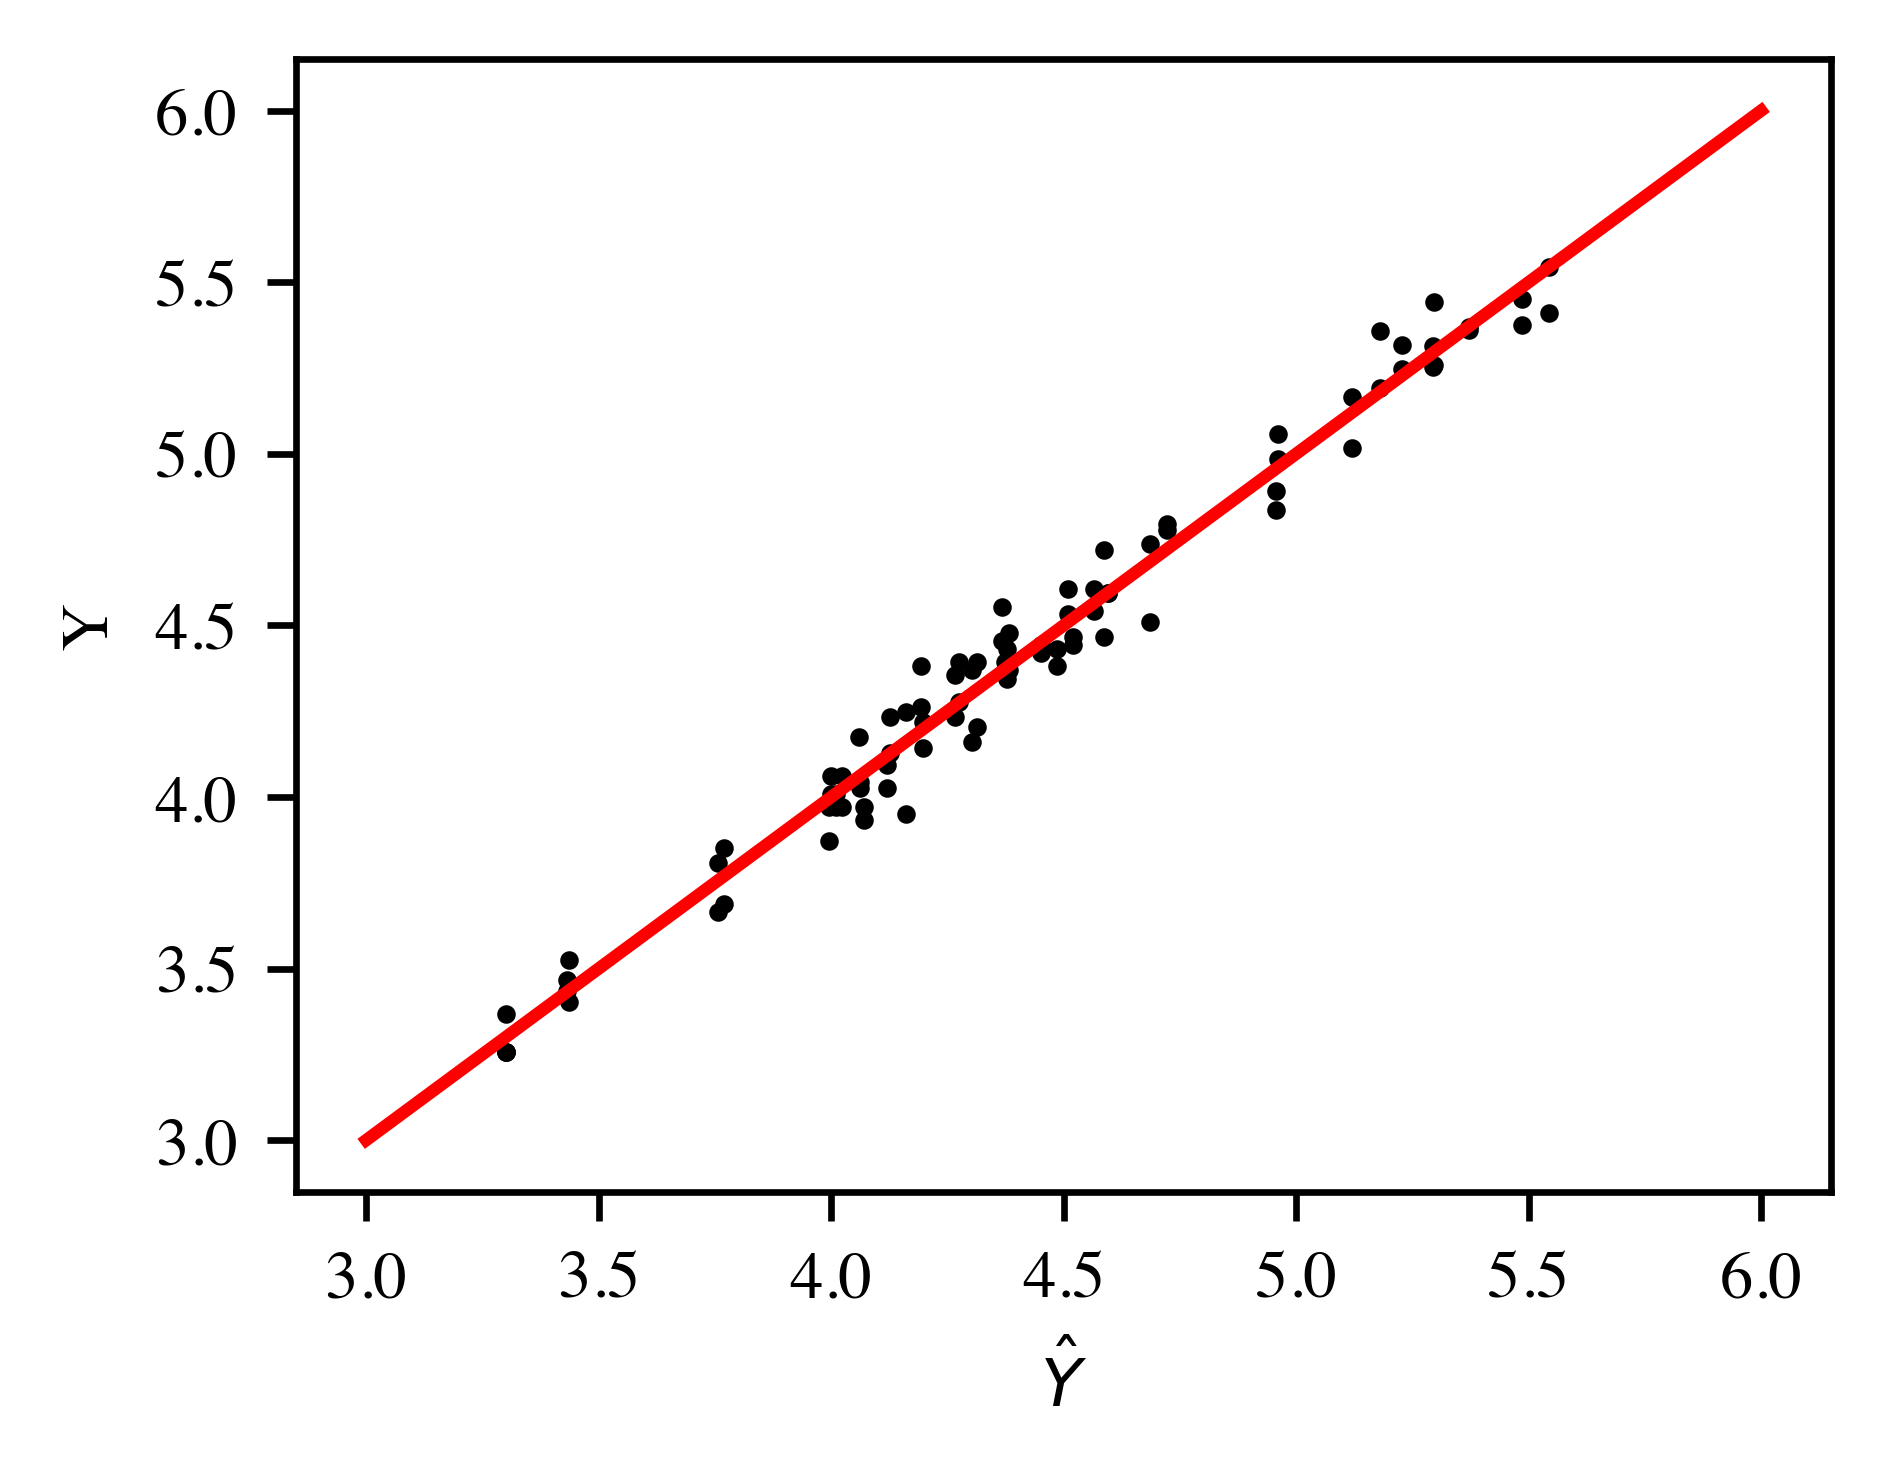

In [17]:
Y_hat = reg.predict(X)
plt.style.use(['ieee'])
plt.plot([ele for ele in range(3,7)], [ele for ele in range(3,7)], 'r', )
plt.scatter(Y_hat, Y, 1.5)
# plt.xlabel("Y hat")
plt.xlabel("$\hat{Y}$")
plt.ylabel("Y")
plt.savefig("./Outputs/regression.png", dpi=300)

# 2. 2030 population prediction

In [18]:
airport_info['Population_2030'] = airport_info['Population']
airport_info

for year in range(2021,2031):
    airport_info['Population_2030'] *= (annual_growth*0.01 + 1)
    print("Year", year)
    
airport_info['Population_2030']

Year 2021
Year 2022
Year 2023
Year 2024
Year 2025
Year 2026
Year 2027
Year 2028
Year 2029
Year 2030


ICAO Code
LIME    1.271861e+07
LIBD    3.161127e+06
LIMF    5.167188e+05
LIRQ    6.304138e+06
LICJ    2.034599e+06
LIPZ    6.121388e+06
LIPY    2.468791e+06
LIRN    6.797300e+06
LIPX    9.739587e+06
LIEO    6.931899e+05
LIPE    7.602086e+06
LICA    1.879418e+06
LICC    3.382752e+06
LIMJ    3.702825e+06
LIBP    2.169622e+06
Name: Population_2030, dtype: float64

# 3. Future demand forecast

In [19]:
num_cities = 15
num_sample = num_cities ** 2 # (num_cities - 1)
cities = airport_info.index
assert cities.__len__() == num_cities
assert airport_info.shape[0] == num_cities

In [20]:
# generate the index for each row in the data samples.
index = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        # if row != col:
        index.append(name1 + '_' + name2)
            
assert len(index) == num_sample

# calculate the population squared in 2020
pop_squared_2030 = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        # if row != col:
        pop_squared_2030.append(airport_info.loc[name1, 'Population_2030'] * airport_info.loc[name2, 'Population_2030'])
            
assert len(pop_squared_2030) == num_sample

# calculate the GDP squared in 2020
gdp_squared_2020 = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        # if row != col:
        gdp_squared_2020.append(airport_info.loc[name1, 'GDP'] * airport_info.loc[name2, 'GDP'])
            
assert len(gdp_squared_2020) == num_sample

# calculate the distance between i and j
dist = []
for row, name1 in enumerate(cities):
    for col, name2 in enumerate(cities):
        # if row != col:
        dist.append(distance.loc[name1, name2])

assert len(dist) == num_sample

In [21]:
demand_forecast = pd.DataFrame(
    {
        "pop_squared" : pop_squared_2030,
        "gdp_squared" : gdp_squared_2020,
        'distance'   : dist
    },
    index=index,
)

demand_forecast['f_distance'] = demand_forecast['distance'] * fuel_cost
demand_forecast.shape

(225, 4)

In [22]:
demand_forecast['demand_2030'] = k * (demand_forecast['pop_squared']**b1) * (demand_forecast['gdp_squared']**b2) / (demand_forecast['f_distance']**b3)
demand_forecast.shape

(225, 5)

In [23]:
demand_2030 = demand_forecast.demand_2030.to_numpy().reshape((num_cities, num_cities))
assert demand_2030.shape == (num_cities, num_cities)

for row in range(num_cities):
    for col in range(num_cities):
        if row == col:
            demand_2030[row, row] = 0
            
np.save("./Outputs/demand.npz", demand_2030)

In [24]:
demand_2030 = np.load("./Outputs/demand.npz.npy")
demand_2030 = pd.DataFrame(demand_2030)
demand_2030

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,114.115216,104.238276,210.316889,96.630051,226.434473,118.369776,160.645481,269.355270,69.296527,253.813863,81.508252,109.575325,178.890797,101.066854
1,114.115216,0.000000,32.730913,83.080523,58.141307,83.505752,58.849759,110.468535,77.815585,33.217401,90.334763,58.777396,69.583975,57.104748,61.135437
2,104.238276,32.730913,0.000000,57.481312,28.538178,57.188459,32.573401,46.368708,61.038999,20.951411,65.272312,23.742779,32.212196,55.049040,28.557776
3,210.316889,83.080523,57.481312,0.000000,69.810959,149.484533,95.642303,120.918846,150.290734,51.539753,209.701365,58.658710,78.256640,110.711003,78.638762
4,96.630051,58.141307,28.538178,69.810959,0.000000,67.575927,45.607623,86.590425,64.779247,32.270590,75.037705,50.065062,77.516829,49.608951,45.046681
5,226.434473,83.505752,57.188459,149.484533,67.575927,0.000000,93.453215,116.077967,176.141205,46.701732,187.321020,58.150421,77.130459,101.563162,75.715764
6,118.369776,58.849759,32.573401,95.642303,45.607623,93.453215,0.000000,84.065438,84.211023,30.875518,103.424113,39.672865,51.780914,58.737554,61.752719
7,160.645481,110.468535,46.368708,120.918846,86.590425,116.077967,84.065438,0.000000,109.522529,50.272325,128.975658,77.070438,96.765770,81.862894,91.654936
8,269.355270,77.815585,61.038999,150.290734,64.779247,176.141205,84.211023,109.522529,0.000000,46.051318,196.035027,55.003216,73.518481,110.749024,70.099614
9,69.296527,33.217401,20.951411,51.539753,32.270590,46.701732,30.875518,50.272325,46.051318,0.000000,54.047955,24.982649,34.534877,37.381212,28.995563


# Visualize the prediction of demands in 2030

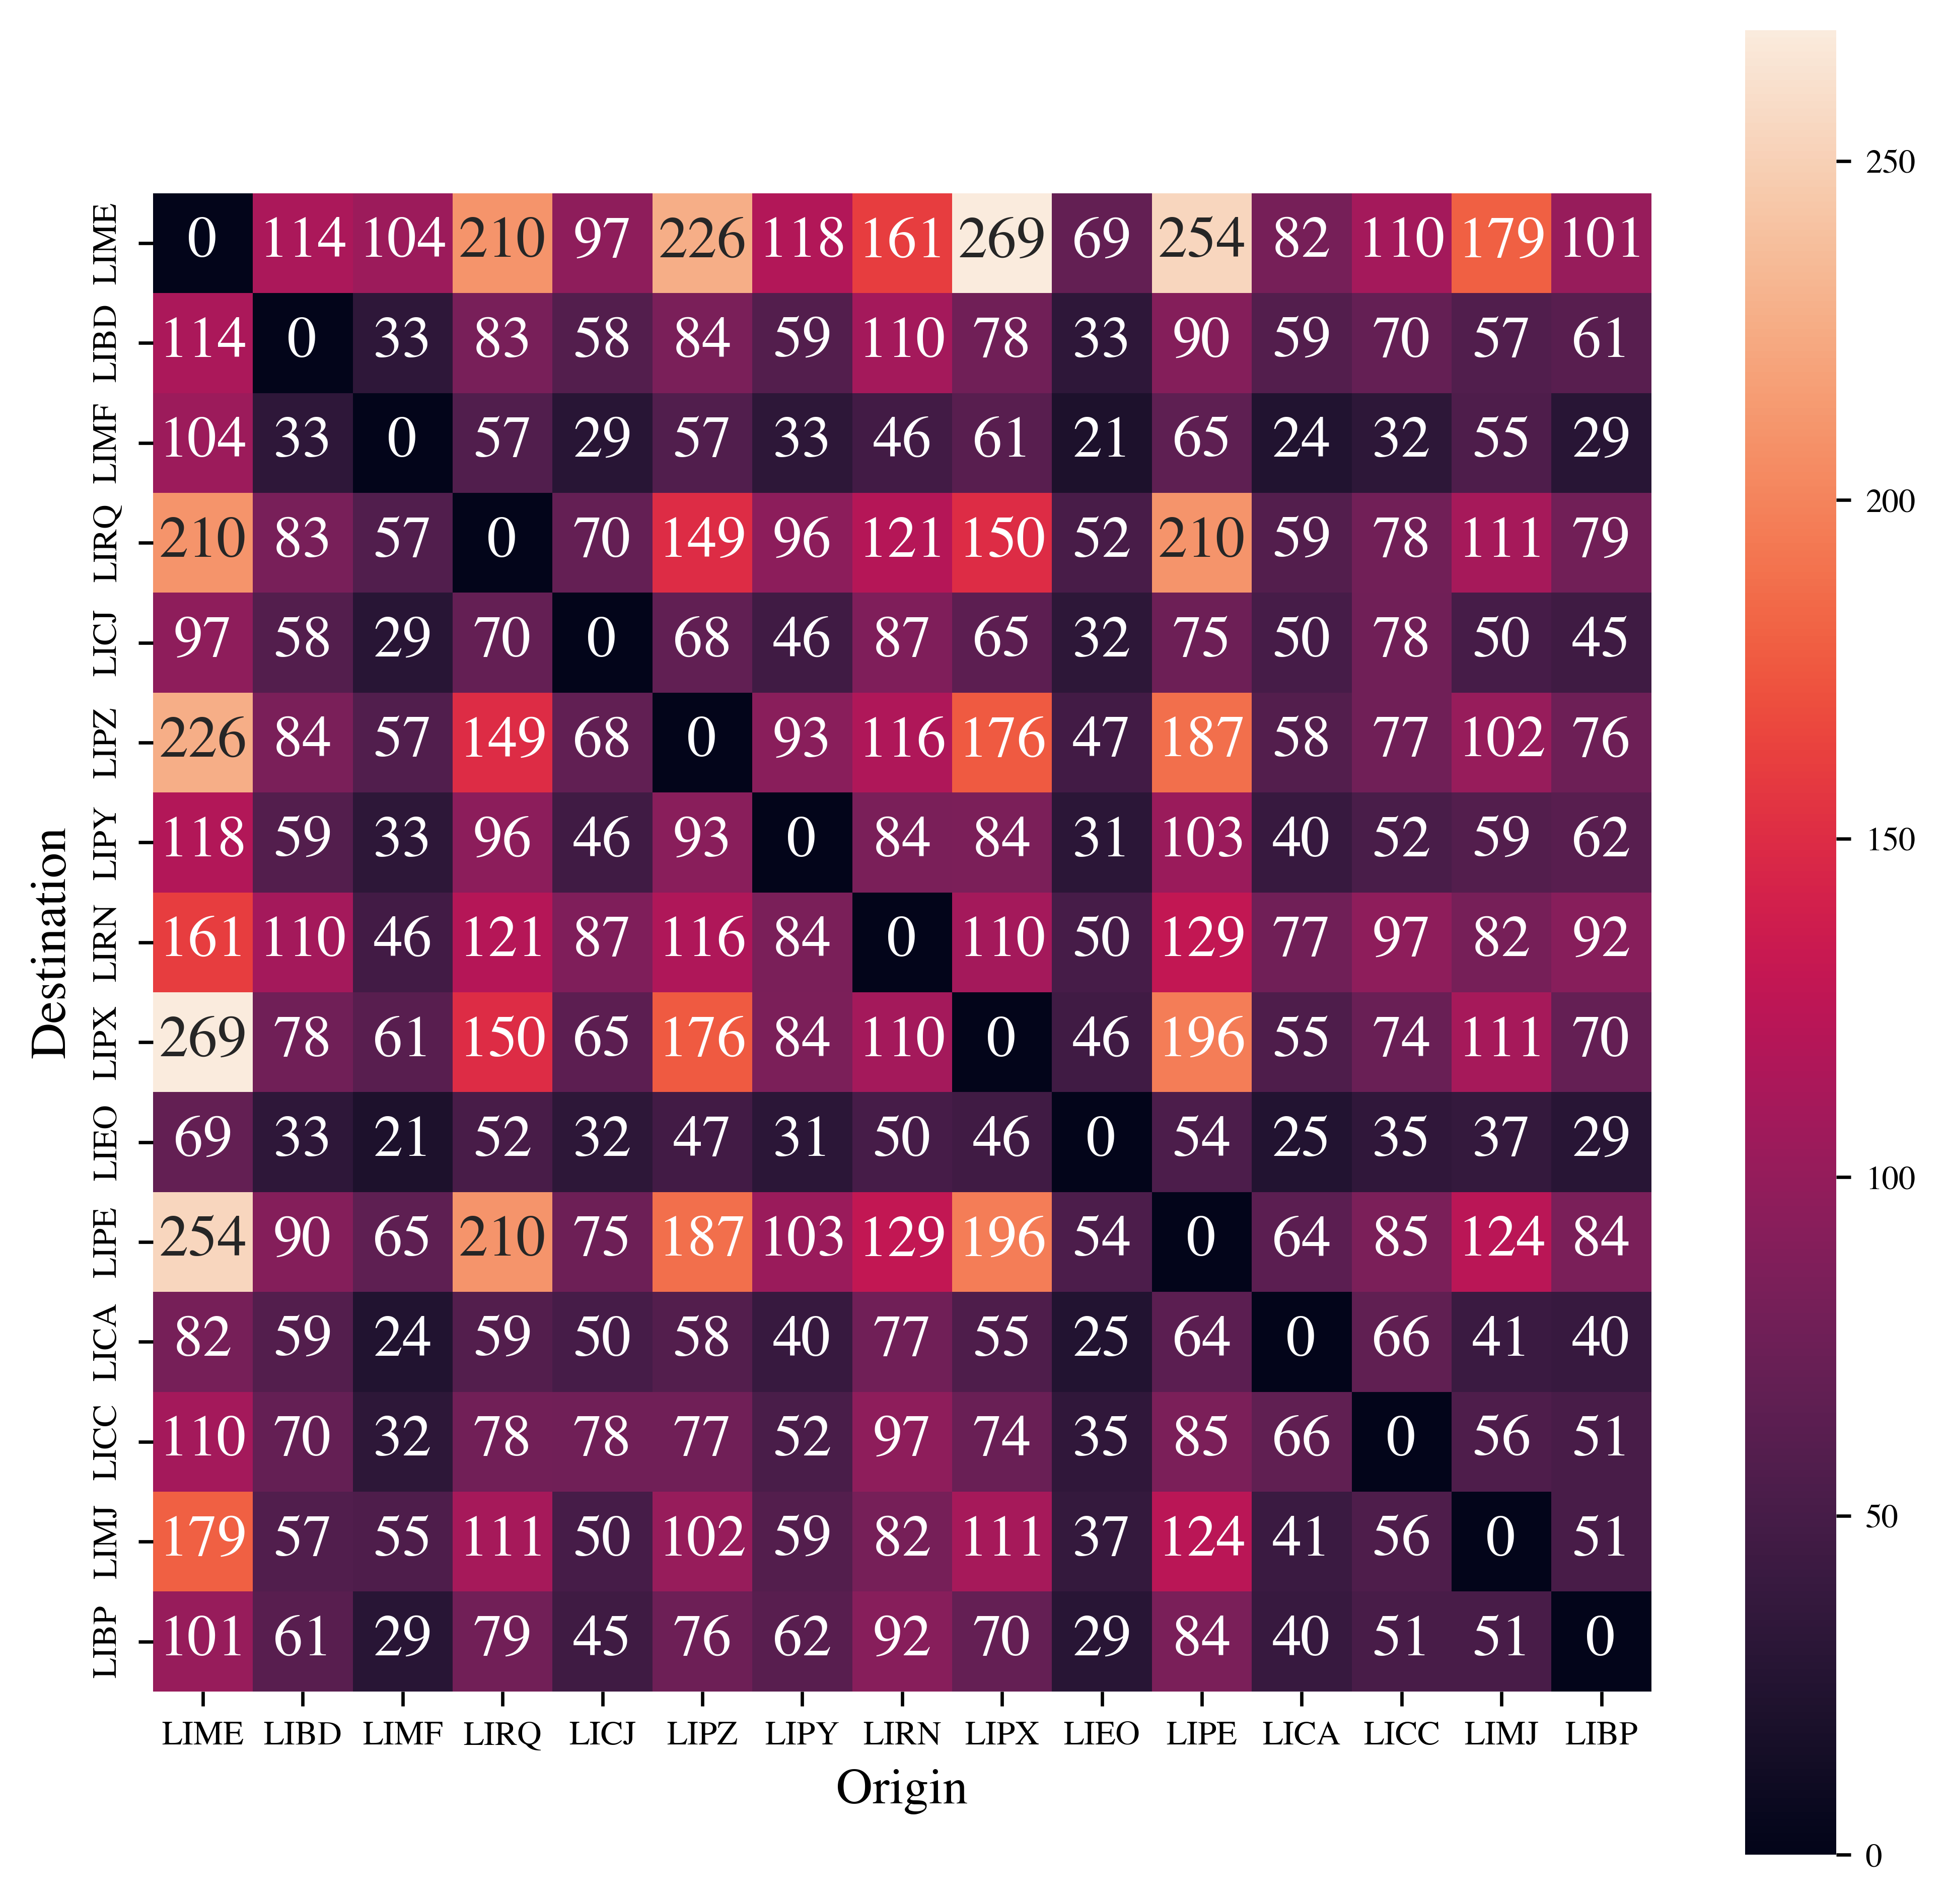

In [25]:
import seaborn as sns
plt.style.use(['ieee'])
plt.figure(figsize=(8,8))
sns.heatmap(
    demand_2030,
    annot=True,
    fmt=".0f",
    square=True,
    xticklabels=list(distance.columns), 
    yticklabels=list(distance.columns),
    # cmap="crest"
    annot_kws={
        'fontsize': 14,
    # 'fontweight': 'bold',
    # 'fontfamily': 'serif'
    }
)
plt.xlabel('Origin', fontdict={'size': 12,})
plt.ylabel('Destination', fontdict={'size': 12,})
# plt.title('Future demands for O-D pairs in 2030', fontdict={'size': 16,})
# plt.show()
plt.savefig('./Outputs/demand2030.png', dpi=400, bbox_inches='tight')